In [1]:
#import libraries

import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Data preparation
dataset_dir= r'D:\Intel PC\Computing Research Club (CRC)\Machine Learning\Artificial Neural Newtork with Python\crc_skin_data'
input_shape=(224, 224, 3)
batch_size=8
num_classes=2

In [3]:
#Data augmentation
train_datagen=ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
validation_split=0.1)

test_datagen=ImageDataGenerator(
rescale=1./255)

In [4]:
# prepare data augmentation configuration
data_generator = ImageDataGenerator(rescale=1. / 255 , validation_split=0.1)

train_data_dir = r'D:\16 OBU students_Model\Dataset\Vehicle_data\Vehicle\Class11(224)'

train_generator = data_generator.flow_from_directory(
   train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size, shuffle=True, seed=13,subset="training",
    class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size, shuffle=False, seed=13,subset="validation",
    class_mode='categorical')

NameError: name 'img_height' is not defined

In [5]:
#Generate the train dataset, validation dataset and test dataset
train_generator=train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',
    validation_split=0.2)  #skin has two classes: benign and malignant


validation_generator=train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary' #skin has two classes: benign and malignant
)

test_generator=test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary' #skin has two classes: benign and malignant
)

Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
#building the model: AlexNet: 8 layers - 5 Conv layers and 3 Fully-connected (FC) layers
model=Sequential()
#Add the convolutional layers
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4,4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

#Flatten the layers
model.add(Flatten())

#Add the fully connected layers
model.add(Dense(4096, activation='relu')) # first FC
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu')) #second FC
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # third FC

In [7]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
#Train the model
history=model.fit(train_generator, epochs=4, validation_data=(validation_generator), verbose=1)


Epoch 1/4
63/63 [==============================] - 15s 230ms/step - loss: 0.6930 - accuracy: 0.5060 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/4
63/63 [==============================] - 13s 207ms/step - loss: 0.6933 - accuracy: 0.4820 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/4
63/63 [==============================] - 13s 203ms/step - loss: 0.6930 - accuracy: 0.5200 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 4/4
63/63 [==============================] - 13s 206ms/step - loss: 0.6930 - accuracy: 0.5140 - val_loss: 0.6931 - val_accuracy: 0.5000


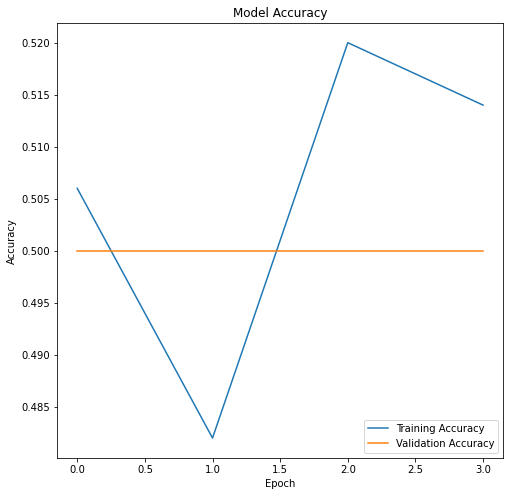

In [9]:
#Training accuracy and validation accuracy graph
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc ='lower right')
plt.show()

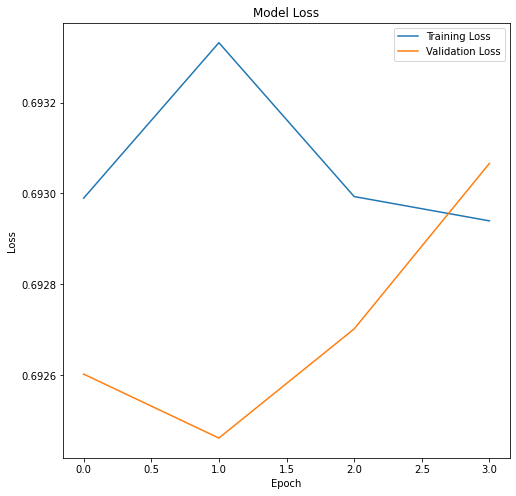

In [10]:
#Trainig loss and validation loss graph
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc ='upper right')
plt.show()